In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [3]:
ev_fiyatlari = pd.read_csv('./data/ev_fiyatlari.csv')
ev_fiyatlari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
SaleCond=pd.get_dummies(ev_fiyatlari.SaleCondition,prefix='SaleCond', drop_first=True)
SaleTyp=pd.get_dummies(ev_fiyatlari.SaleType,prefix='SaleTyp', drop_first=True)
KitchenQ=pd.get_dummies(ev_fiyatlari.KitchenQual,prefix='KitchenQ', drop_first=True)
numerik_kolonlar = [kolon for kolon in ev_fiyatlari.dtypes[ev_fiyatlari.dtypes.values == 'int64'].index 
                    if kolon not in ["Id", "SalePrice"] ]
X = ev_fiyatlari[numerik_kolonlar]

X=pd.concat([X,KitchenQ,SaleTyp,SaleCond], axis=1)

Y=ev_fiyatlari.SalePrice

In [5]:
X = sm.add_constant(X)

In [6]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

#modelde YearRemodAdd, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, LowQualFinSF, BsmtHalfBath, FullBath, HalfBath, 
#GarageArea, OpenPorchSF, EnclosedPorch, MiscVal, MoSold, YrSold,SaleConditon, SaleType anlamsız duran veriler



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        14:13:44   Log-Likelihood:                -17240.
No. Observations:                1460   AIC:                         3.458e+04
Df Residuals:                    1412   BIC:                         3.483e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.272e+05   1.36e+06      0.240      0.811   -2.35e+06       3e+06
MSSubClass        -161.5423     25.186     -6.414      0.000    -210.947    -112.137
LotArea              0.4158      0.096      4.335      0.000       0.228       0.604
OverallQual       1.459e+04   1170.411     12.469      0.000    1.23e+04    1.69e+04
OverallCond       5276.2977    993.560      5.310      0.000    3327.286    7225.309
YearBuilt          355.0219     58.854      6.032      0.000     239.571     470.473
YearRemodAdd         4.7347     67.216      0.070      0.944    -127.119     136.588
BsmtFinSF1           9.0472      2.414      3.747      0.000       4.311      13.783
BsmtFinSF2           0.3128      4.316      0.072      0.942      -8.153       8.779
BsmtUnfSF           -0.9880      2.322     -0.426      0.671      -5.543       3.567
TotalBsmtSF          8.3720      3.255      2.572      0.010       1.986      14.758
1stFlrSF            18.9999      5.860      3.242      0.001       7.504      30.496
2ndFlrSF            21.5047      5.400      3.983      0.000      10.912      32.097
LowQualFinSF        -9.7481     14.085     -0.692      0.489     -37.379      17.882
GrLivArea           30.7565      5.417      5.678      0.000      20.131      41.382
BsmtFullBath      9282.9923   2510.647      3.697      0.000    4357.992    1.42e+04
BsmtHalfBath      2966.1810   3921.897      0.756      0.450   -4727.190    1.07e+04
FullBath          5145.3599   2701.615      1.905      0.057    -154.252    1.04e+04
HalfBath         -1532.1938   2546.113     -0.602      0.547   -6526.764    3462.377
BedroomAbvGr     -6466.9466   1657.758     -3.901      0.000   -9718.881   -3215.012
KitchenAbvGr     -1.175e+04   5054.329     -2.325      0.020   -2.17e+04   -1838.519
TotRmsAbvGrd      2584.2620   1200.286      2.153      0.031     229.726    4938.798
Fireplaces        3821.5191   1689.024      2.263      0.024     508.253    7134.785
GarageCars        1.289e+04   2741.294      4.703      0.000    7513.942    1.83e+04
GarageArea          -6.7488      9.305     -0.725      0.468     -25.001      11.504
WoodDeckSF          29.4081      7.620      3.859      0.000      14.461      44.356
OpenPorchSF        -11.7022     14.445     -0.810      0.418     -40.039      16.634
EnclosedPorch       11.8003     16.158      0.730      0.465     -19.897      43.498
3SsnPorch           24.5906     29.861      0.824      0.410     -33.986      83.167
ScreenPorch         56.6169     16.392      3.454      0.001      24.462      88.772
PoolArea           -43.2632     22.704     -1.906      0.057     -87.800       1.273
MiscVal             -0.3917      1.768     -0.222      0.825      -3.860       3.077
MoSold            -294.9070    330.241     -0.893      0.372    -942.724     352.910
YrSold            -523.

In [15]:
indirgenmis_kolanlar=['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1','TotalBsmtSF','2ndFlrSF','GrLivArea','BsmtFullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch','PoolArea','KitchenQ_Fa','KitchenQ_Gd','KitchenQ_TA','SaleTyp_New']
X=X[indirgenmis_kolanlar]
X = sm.add_constant(X)

In [16]:
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     316.0
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        14:30:41   Log-Likelihood:                -17256.
No. Observations:                1460   AIC:                         3.456e+04
Df Residuals:                    1437   BIC:                         3.468e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -7.59e+05   9.13e+04     -8.309      0.000   -9.38e+05    -5.8e+05
MSSubClass    -151.9342     24.588     -6.179      0.000    -200.166    -103.702
LotArea          0.4370      0.095      4.580      0.000       0.250       0.624
OverallQual   1.502e+04   1151.089     13.050      0.000    1.28e+04    1.73e+04
OverallCond   5326.9259    902.611      5.902      0.000    3556.350    7097.502
YearBuilt      382.7055     45.894      8.339      0.000     292.679     472.732
BsmtFinSF1      10.5977      2.913      3.638      0.000       4.884      16.312
TotalBsmtSF      7.0015      3.917      1.787      0.074      -0.683      14.686
2ndFlrSF         1.8513      4.500      0.411      0.681      -6.976      10.679
GrLivArea       49.7269      5.131      9.692      0.000      39.663      59.791
BsmtFullBath  8173.8641   2260.848      3.615      0.000    3738.947    1.26e+04
BedroomAbvGr -5710.8893   1610.789     -3.545      0.000   -8870.639   -2551.140
KitchenAbvGr -9661.8177   4823.473     -2.003      0.045   -1.91e+04    -200.014
TotRmsAbvGrd  2669.0035   1189.353      2.244      0.025     335.950    5002.057
Fireplaces    4265.1131   1644.971      2.593      0.010    1038.312    7491.914
GarageCars    1.137e+04   1618.674      7.022      0.000    8191.269    1.45e+04
WoodDeckSF      30.4960      7.530      4.050      0.000      15.724      45.268
ScreenPorch     49.9172     16.106      3.099      0.002      18.323      81.512
PoolArea       -46.5610     22.258     -2.092      0.037     -90.223      -2.899
KitchenQ_Fa  -3.556e+04   7405.918     -4.801      0.000   -5.01e+04    -2.1e+04
KitchenQ_Gd  -4.208e+04   4030.335    -10.440      0.000      -5e+04   -3.42e+04
KitchenQ_TA  -4.823e+04   4612.016    -10.458      0.000   -5.73e+04   -3.92e+04
SaleTyp_New   1.941e+04   3550.927      5.466      0.000    1.24e+04    2.64e+04
==============================================================================
Omnibus:                      860.390   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176497.760
Skew:                          -1.630   Prob(JB):                         0.00
Kurtosis:                      56.765   Cond. No.                     1.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelin ortalama hatası : -0.000000000106000


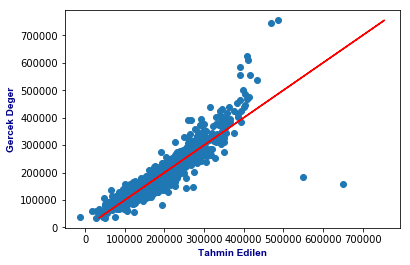

In [19]:
tahmin = sonuclar.predict(X)
hatalar = Y - tahmin

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

plt.scatter(tahmin, Y)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Gercek Deger', fontdict=eksen_font)
plt.plot(Y, Y, color="red")

print("Modelin ortalama hatası : {:.15f}".format(np.mean(hatalar)))